# 数据结构 学习

## 时间复杂度

算法复杂度，用来表征代码的运行速度，range(n) for 循环执行n次，时间复杂度为n, 二次为n2,打印时间复杂度为O(1)---一个常量， while n>1: print(n) n//2 当n=64时，代码执行6次，因此时间复杂度为O(log2n)或者O(logn)


常见的时间复杂度：O(1)<O(logn)<O(nlogn)<O(n2)<O(n2logn)<o(n3)

复杂问题的时间复杂度O(n!),O(2n),O（nn)


简单判定时间复杂度
1 确定问题规模n 
2 循环减半----logn 
3 k 层关于n的循环---nk


##  递归算法 (经典汉诺塔问题）

In [5]:
def hanoi(n,a,b,c):# n 为盘子的个数,a,b,c 为三根柱子
    if n>0:
        hanoi(n-1,a,c,b)
        print("moving from %s to %s"%(a,c))
        hanoi(n-1,b,a,c)
        
hanoi(3,'a','b','c')

        

moving from a to c
moving from a to b
moving from c to b
moving from a to c
moving from b to a
moving from b to c
moving from a to c


##  列表查找

In [15]:
### 顺序查找
def linear_search(data_set,val):#一个是列表，一个是要查找的数值
    for i, j in enumerate(data_set):
        if j==val:
            print(i)
    else:##循环结束也没找到
        return None

li=list(range(100000))
linear_search(li,3998)
    ####算法时间复杂度为O(n)

3998


## 二分查找


In [16]:
def binary_search(li,val):
    left=0
    right=len(li)-1
    while left<=right:###说明还可以继续查找
        mid=(left+right)//2##整除
        if li[mid]==val:
            return mid
        elif li[mid]>val:##索要找的值在中间值的左侧，这时候异动右指标
            right=mid-1
        else:#索要找的在中间值右侧
            left=mid+1
    else:
        return None

    
li=list(range(100000))
print(binary_search(li,3998))


#时间复杂度为O（logn)
        
        

3998


## 排序相关

In [2]:
###冒泡排序
###升序：列表每两个相邻的数，前边比后边的大，则交换这两个元素
###一遍后，对无序区进行二次排序，有序区则不需要排序

##排序算法一共n-1次循环
##一次排序后，有序区增加一个数，无序区少一个数


import  random 
def bubble_sort(li):
    for i in range(len(li)-1):#第几次循环
        for j in range(len(li)-i-1):##只对无序区进行相关排序
            if li[j]>li[j+1]:###升序排列，   降序将大于号改为小于号
                li[j],li[j+1]=li[j+1],li[j]
    return li 

li=[random.randint(0,1000) for i in range(10)]

print(bubble_sort(li))


###两次for 循环，复杂度为n的平方 




[7, 8, 12, 140, 335, 413, 461, 713, 860, 987]


In [ ]:
##上述代码存在一个问题就是，如果每一趟没有元素交换，其实就已经排好序了，因此可以直接结束掉循环
def bubble_sort(li):
    for i in range(len(li)-1):#第几次循环
        exchange=False##交换标识符
        for j in range(len(li)-i-1):##只对无序区进行相关排序
            if li[j]>li[j+1]:###升序排列，   降序将大于号改为小于号
                li[j],li[j+1]=li[j+1],li[j]
                exchange=True
        if not exchange:
            return #跳出最外层循环，结束
        

In [ ]:
###选择排序，差版本

#遍历一遍，找到一个最小的，然后再循环一遍，再找到一个最小的

def select_sort_simple(li):
    li_new=[]
    for i in range(len(li)):#循环次数
        min_value=min(li)
        li_new.append(min_value)
        li.remove(min_value)
    return li_new


###缺点：创建新的列表，占用更多的内存  时间复杂度为o(n2)

      
    

In [3]:
##选择排序  改进
##不想要开辟新空间，那把找到的最小值放在第一个位置，第一个位置的值放到最小值的位置
def select_sort(li):
    for i in range (len(li)-1):##循环的次数
        min_loc=i##先假定无序区的第一个数为最小值
        for j in range(i+1,len(li)):##所要看的无序区间   ##或者range(i,len(li))
            if li[j]<li[min_loc]:
                min_loc=j
        li[i],li[min_loc]=li[min_loc],li[i]
    return li 

li=[3,2,4,7,8,1]
print(select_sort(li))

###算法关键是有序区和无序区的位置，及无序区的最小数的位置

##时间复杂度为o(n2)


[1, 2, 3, 4, 7, 8]


In [1]:
###插入排序 insert_sort 

def insert_sort(li):
    for i in range(1,len(li)):## i 表示摸到的牌的下标
        tmp=li[i]#摸到的那一张牌
        j=i-1# 手里的牌的下标
        while j>=0 and li[j]>tmp:
            li[j+1]=li[j]
            j-=1
        li[j+1]=tmp
    return li 


li=[3,5,8,9,2,1]
insert_sort(li)
        

####时间复杂度O（n2)
        


[1, 2, 3, 5, 8, 9]

In [5]:
##快速排序


##思路：
 #  取出第一个元素p, 使元素p归位
 #  列表被p分成两个部分，左边比p小，右边比p大
# 不断递归完成排序



##关键在于找到归位的方法， 

def partition(li,left,right):
    tmp=li[left]
    while left<right:
        while left<right and li[right]>=tmp:##从右侧找比tmp小的数
            right-=1##右指针往左移动
        li[left]=li[right]##将右边的数放到左边
        while left<right and li[left]<=tmp:# 左边的数对比如果比对比数字小
            left+=1
        li[right]=li[left]##把左边的值放到右边
    li[left]=tmp
    return left##返回mid的值
    
def quick_sort(li,left,right):
    if left<right:
        mid=partition(li,left,right)
        quick_sort(li,left,mid-1)
        quick_sort(li,mid+1,right)
        

li=[3,2,4,7,8,9]
quick_sort(li,0,len(li)-1)
print(li)
        


[2, 3, 4, 7, 8, 9]


###  堆的相关排序
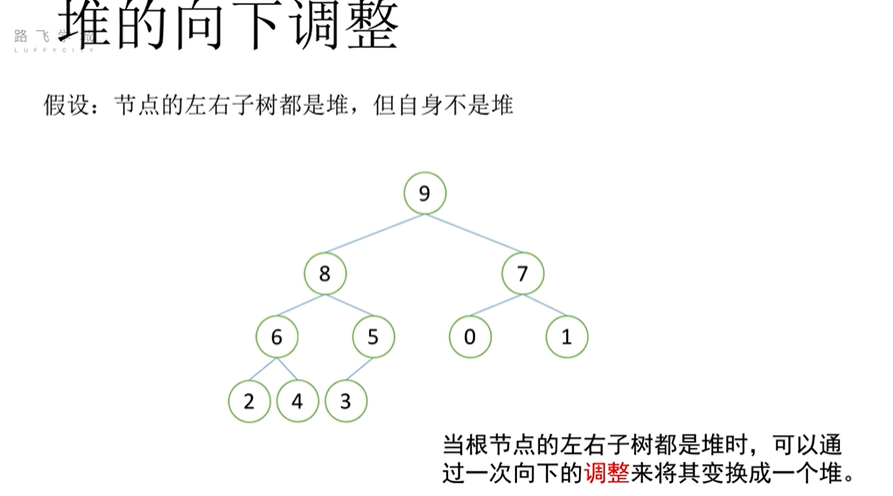


<span class="burk">堆是一个完全二叉树</span>

堆又分为大根堆和小根堆，大根堆指每一个父节点都比子节点大；小根堆则相反


1. 建立一个堆，由非叶子节点开始，“农村包围城市”
2. 得到堆顶元素，即为最大元素
3. 去掉堆顶，将堆最后一个元素放到堆顶，此时可通过一次调整重新使堆有序
4. 堆顶元素为第二大元素
5. 重复步骤3，直到堆变空



In [5]:
###堆的向下调整的函数实现

##调整函数，建d
def sift(li,low,high):
    "low:堆的根顶位置"
    "high:堆底的位置"
    i=low#最开始指向根节点
    j=2*i+1#从父亲找孩子
    tmp=li[low]##堆顶数据
    while j<=high:#如果j>high 则说明，J已经处于树的最后一层，没有子节点
        if j+1<=high and li[j+1]>li[j]:#i的下一层存在右节点， i的下一层的左节点和右节点进行比较,
            j=j+1###将j的位置从左节点换到右节点
        if li[j]>tmp:
            li[i]=li[j]
            i=j
            j=2*+1##下移动一层
        else:#tmp更大，把tmp放到i的位置
#             li[i]=tmp 
            break 
    else:
        li[i]=tmp 
        
        
def heap_sort(li):
    n=len(li)
    for i in range((n-2)//2,-1,-1):#构建堆，i表示非叶子节点
        sift(li,i,n-1)#指向整个根的最后节点
    #上述for 循环结束，农村包围城市成功，构建堆完成,接下来需要出数
    for i in range(n-1,-1,-1):##这个循环用来将最大的数拿出来
        li[i],li[0]=li[0],li[i]#将浮上去的最后一个元素拿下来，相当于存储
        sift(li,0,i-1)##i-1为新的high位置
    #此时i为0,排序完成
    print(li)
    
    
import random 
li=[i for i in range(100)]
print(random.shuffle(li))


# heap_sort(li)



        
        
    

None
